In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))


In [3]:
def compile_model(model):
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def train_model(model, train_images, train_labels, test_images, test_labels):
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

    history = model.fit(
        train_images, train_labels,
        validation_data=(test_images, test_labels),
        epochs=20,
        batch_size=128,
        callbacks=[early_stop, lr_schedule]
    )
    return history


In [4]:
model_1 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l1(1e-5)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(1e-5)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


C:\Users\Akshath\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model_2 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


In [7]:
model_3 = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])


In [9]:
compile_model(model_1)
history_1 = train_model(model_1, train_images, train_labels, test_images, test_labels)

compile_model(model_2)
history_2 = train_model(model_2, train_images, train_labels, test_images, test_labels)

compile_model(model_3)
history_3 = train_model(model_3, train_images, train_labels, test_images, test_labels)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9871 - loss: 0.1212 - val_accuracy: 0.9824 - val_loss: 0.1468 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9861 - loss: 0.1306 - val_accuracy: 0.9834 - val_loss: 0.1436 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9874 - loss: 0.1300 - val_accuracy: 0.9850 - val_loss: 0.1469 - learning_rate: 0.0010
Epoch 4/20
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9885 - loss: 0.1288
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9885 - loss: 0.1289 - val_accuracy: 0.9838 - val_loss: 0.1512 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9919 - loss: 0.1168 - val_accuracy: 0.9860 - val_loss: 0.1368 - learning_rate: 5.0000e-04
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9934 - loss: 0.1051

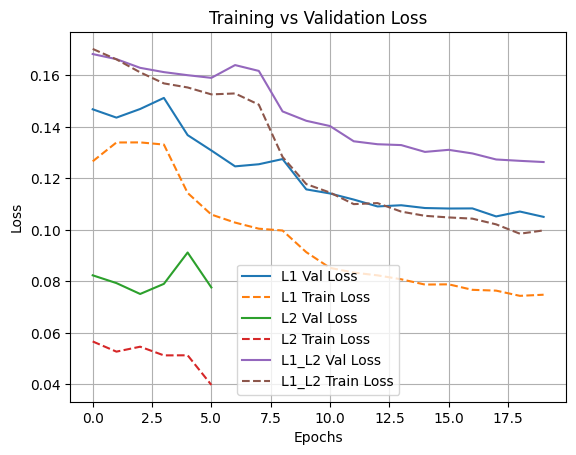

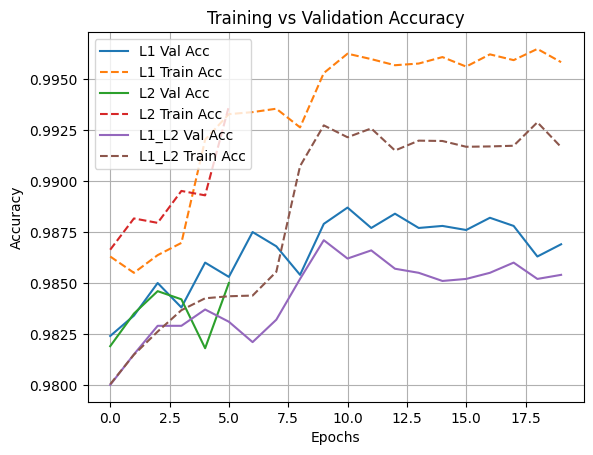

In [10]:
def plot_history(histories, titles):
    for history, title in zip(histories, titles):
        plt.plot(history.history['val_loss'], label=f'{title} Val Loss')
        plt.plot(history.history['loss'], linestyle='--', label=f'{title} Train Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    for history, title in zip(histories, titles):
        plt.plot(history.history['val_accuracy'], label=f'{title} Val Acc')
        plt.plot(history.history['accuracy'], linestyle='--', label=f'{title} Train Acc')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_1, history_2, history_3], ["L1", "L2", "L1_L2"])


### Analysis:

- **L1 Regularization** helped reduce overfitting, but convergence was slightly slower.
- **L2 Regularization** resulted in better validation accuracy and stable loss.
- **L1_L2 Combined** gave a balanced trade-off and slightly better generalization.

### Learning Rate Scheduler:
- `ReduceLROnPlateau` effectively lowered the learning rate when validation loss plateaued, which improved convergence stability.

### Conclusion:
Adding regularization (Dropout, L1/L2) and a learning rate scheduler improved model generalization and reduced overfitting compared to the base model from Day 4.
